In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

import lipextension

import plotly.graph_objects as go

In [3]:
random.seed(2024)

# fixing the dimension
dim=2

In [4]:
# fixing the sample size and the dimension
num_points = 200

In [5]:
# Generate uniformly random points and random functions

E = np.random.uniform(-1,1,(num_points, dim)) # data set
f = np.random.uniform(-1,1,num_points) # function   

Alternatively, we can generate a bunch of points on something more geometric. The example below generates points on a unit circle in $\mathbb{R}^2$.

In [17]:
# Generate random angles
angles = 2 * np.pi * np.random.rand(num_points)

# Compute x and y coordinates
x_points = np.cos(angles)
y_points = np.sin(angles)


E = np.column_stack((x_points, y_points))
f = np.random.uniform(-1,1,num_points)

<function matplotlib.pyplot.legend(*args, **kwargs)>

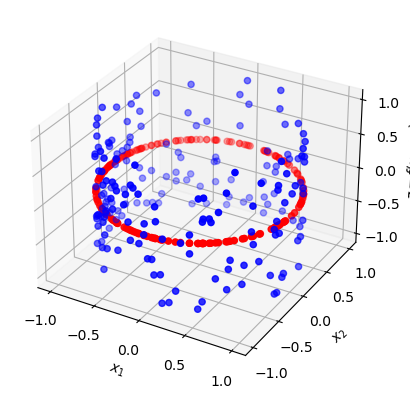

In [21]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(E[:, 0], E[:, 1], f, color='blue', label=r'$(E,f)$')
ax.scatter(E[:,0],E[:,1],np.zeros(len(f)), color='red',label=r'$E\subset \mathbb{R}^2')

# Labels and title
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$z = f(x_1, x_2)$')
plt.legend

In [21]:
# compute all the essential quantities

x_val = np.concatenate((generate_grid(dim, 200),E))
y_val_lower = lip_ext_lower(x_val,E,f)
y_val_upper = lip_ext_upper(x_val,E,f)
L = lipnorm(E,f)

In [20]:

fig = go.Figure()


# Add lower Lipschitz extension line
fig.add_trace(go.Scatter3d(
    x=x_val[:, 0], y=x_val[:, 1], z=y_val_lower,
    mode='lines',
    name='lower Lipschitz extension'
))

# Add upper Lipschitz extension line
fig.add_trace(go.Scatter3d(
    x=x_val[:, 0], y=x_val[:, 1], z=y_val_upper,
    mode='lines',
    name='upper Lipschitz extension'
))

# Add scatter points
fig.add_trace(go.Scatter3d(
    x=E[:, 0], y=E[:, 1], z=f,
    mode='markers',
    marker=dict(color='red', size=5),
    name='$(E,f)$'
))

# Set axis limits
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-3, 3]),
        yaxis=dict(range=[-3, 3]),
        zaxis=dict(title='z = F(x,y)'),
    ),
    title=dict(text=r'Lipschitz extension with $L=$'+str(L)),
    legend=dict(x=0, y=1)
)

fig.show()

In [22]:

# Contour plot of the lower Lipschitz extension
# Not effective visualiztion for dense sampling

fig = go.Figure()

# Add contour plot for the function
fig.add_trace(go.Contour(
    x=x_val[:,0], y=x_val[:,1], z=y_val_lower,
    colorscale='Viridis',
    line_smoothing=0.85,
    contours=dict(
        start=-2*L, end=2*L, size=0.1*L,
    ),
    colorbar=dict(title='z = F(x,y)'),
    name='Contour Plot'
))



# Set axis limits and layout
fig.update_layout(
    xaxis=dict(
        scaleanchor="y",
        scaleratio=1,
        range=[-3, 3],
        title=r'$x\in \mathbb{R}^2$'
    ),
    yaxis=dict(
        range=[-3, 3],
        title='extension $F(x)$'
    ),
    title=dict(text=f'Lower Lipschitz extension with L={L}'),
    legend=dict(x=0, y=1)
)

fig.show()